<a href="https://www.kaggle.com/code/subhajeetdas/cat-and-dog-classification?scriptVersionId=167055262" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL as pl
from sklearn.model_selection import train_test_split
import random
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory as img_dir
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AvgPool2D, Flatten, Dense, Dropout, BatchNormalization

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(os.path.join(dirname))

import warnings
warnings.filterwarnings('ignore')

2024-03-14 21:44:41.313583: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-14 21:44:41.313675: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-14 21:44:41.458770: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input
/kaggle/input/microsoft-catsvsdogs-dataset
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat


In [2]:
!nvidia-smi

Thu Mar 14 21:45:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0              26W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
img = cv2.imread('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/10022.jpg')

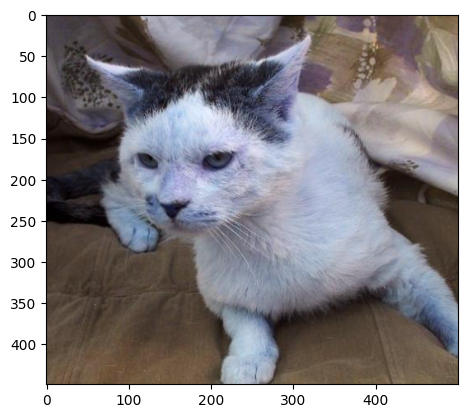

In [4]:
plt.imshow(img)

In [5]:
img.shape

(449, 500, 3)

In [6]:
data_dir = '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages'
img_height = 100
img_width = 100

In [7]:
# First Section of the path
directory = r"/kaggle/input/microsoft-catsvsdogs-dataset/PetImages"

# Second section of the path
categories = ["Cat","Dog"]

# Now we get the images using complete path and store the images into img_data folder.
img_data = []
for cata in categories:
    folder = os.path.join(directory, cata)
    label = categories.index(cata)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)

        try:
            # Attempt to read and resize the image
            img_array = cv2.imread(img_path)
            img_array = cv2.resize(img_array, (img_height, img_width))

            # Check if the image array is not empty
            if img_array is not None and not img_array.size == 0:
                img_data.append([img_array, label])

        except Exception as e:
            continue

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9


In [8]:
# Now shuffle the images 
random.shuffle(img_data)

In [9]:
x=[]
y=[]
for features,labels in img_data:
    x.append(features)
    y.append(labels)
    
#Convert X and Y list into array
X=np.array(x, dtype = float)
Y=np.array(y, dtype = float)

In [10]:
X.shape

(24946, 100, 100, 3)

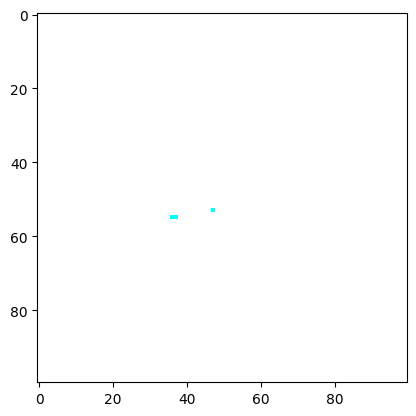

In [11]:
plt.imshow(X[19])

In [12]:
print(X[19])

[[[237. 239. 217.]
  [235. 234. 207.]
  [229. 228. 197.]
  ...
  [140. 142. 122.]
  [172. 173. 153.]
  [177. 178. 158.]]

 [[237. 239. 217.]
  [235. 234. 207.]
  [229. 228. 198.]
  ...
  [142. 144. 124.]
  [172. 174. 154.]
  [179. 180. 160.]]

 [[239. 238. 217.]
  [235. 231. 204.]
  [235. 227. 198.]
  ...
  [143. 147. 126.]
  [164. 173. 152.]
  [179. 181. 162.]]

 ...

 [[205. 187. 156.]
  [210. 192. 160.]
  [208. 190. 158.]
  ...
  [ 40.  60.  61.]
  [ 40.  60.  61.]
  [ 39.  59.  60.]]

 [[199. 184. 152.]
  [201. 185. 153.]
  [203. 187. 155.]
  ...
  [ 40.  60.  61.]
  [ 40.  60.  61.]
  [ 38.  58.  59.]]

 [[204. 189. 157.]
  [208. 193. 161.]
  [202. 187. 155.]
  ...
  [ 40.  60.  61.]
  [ 40.  60.  61.]
  [ 38.  58.  59.]]]


In [13]:
for i in range(len(X)):
    X[i] = X[i]/255.0

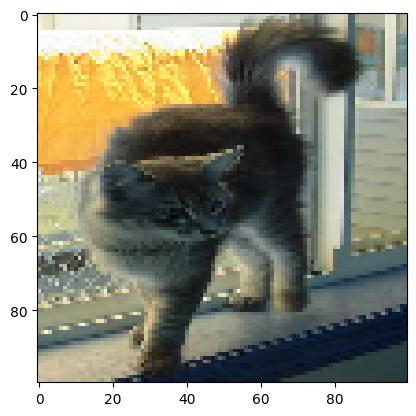

In [14]:
plt.imshow(X[19])

In [15]:
print(X[19])

[[[0.92941176 0.9372549  0.85098039]
  [0.92156863 0.91764706 0.81176471]
  [0.89803922 0.89411765 0.77254902]
  ...
  [0.54901961 0.55686275 0.47843137]
  [0.6745098  0.67843137 0.6       ]
  [0.69411765 0.69803922 0.61960784]]

 [[0.92941176 0.9372549  0.85098039]
  [0.92156863 0.91764706 0.81176471]
  [0.89803922 0.89411765 0.77647059]
  ...
  [0.55686275 0.56470588 0.48627451]
  [0.6745098  0.68235294 0.60392157]
  [0.70196078 0.70588235 0.62745098]]

 [[0.9372549  0.93333333 0.85098039]
  [0.92156863 0.90588235 0.8       ]
  [0.92156863 0.89019608 0.77647059]
  ...
  [0.56078431 0.57647059 0.49411765]
  [0.64313725 0.67843137 0.59607843]
  [0.70196078 0.70980392 0.63529412]]

 ...

 [[0.80392157 0.73333333 0.61176471]
  [0.82352941 0.75294118 0.62745098]
  [0.81568627 0.74509804 0.61960784]
  ...
  [0.15686275 0.23529412 0.23921569]
  [0.15686275 0.23529412 0.23921569]
  [0.15294118 0.23137255 0.23529412]]

 [[0.78039216 0.72156863 0.59607843]
  [0.78823529 0.7254902  0.6       ]


In [16]:
X.shape

(24946, 100, 100, 3)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [18]:
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, train_size = 0.3)

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(256, (3, 3), padding = 'same', input_shape = X.shape[1: ], activation = 'tanh'))
model.add(BatchNormalization(axis=1))
model.add(AvgPool2D(2,2))
model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'tanh'))
model.add(AvgPool2D(2,2))
model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'tanh'))
model.add(AvgPool2D(2,2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(2000, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [21]:
model.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 256)  │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100, 100, 256)  │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 50, 50, 256)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 25, 25, 256)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 12, 12, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2000)           │    36,866,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1000)           │     2,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         1,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760,689 (151.67 MB)

 Trainable params: 39,760,489 (151.67 MB)

 Non-trainable params: 200 (800.00 B)

In [23]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val),epochs = 15)

Epoch 1/15
  3/546 ━━━━━━━━━━━━━━━━━━━━ 25s 46ms/step - accuracy: 0.4948 - loss: 1.2429   

I0000 00:00:1710452910.494154      80 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1710452910.515813      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


546/546 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5014 - loss: 0.8086

W0000 00:00:1710452940.622726      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1710452942.155604      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


546/546 ━━━━━━━━━━━━━━━━━━━━ 45s 62ms/step - accuracy: 0.5014 - loss: 0.8084 - val_accuracy: 0.5261 - val_loss: 0.6970
Epoch 2/15
546/546 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.5715 - loss: 0.6795 - val_accuracy: 0.6165 - val_loss: 0.6399
Epoch 3/15
546/546 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.6261 - loss: 0.6373 - val_accuracy: 0.6655 - val_loss: 0.6147
Epoch 4/15
546/546 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.6489 - loss: 0.6177 - val_accuracy: 0.6641 - val_loss: 0.6089
Epoch 5/15
546/546 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.6743 - loss: 0.5968 - val_accuracy: 0.6891 - val_loss: 0.5824
Epoch 6/15
546/546 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.7015 - loss: 0.5782 - val_accuracy: 0.6851 - val_loss: 0.5787
Epoch 7/15
546/546 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.6983 - loss: 0.5673 - val_accuracy: 0.7047 - val_loss: 0.5681
Epoch 8/15
546/546 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.7065 - loss: 0.5570 - val_accurac

In [24]:
model.evaluate(x_test, y_test)

164/164 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.7382 - loss: 0.5423


W0000 00:00:1710453301.749417      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[0.530087411403656, 0.7404084801673889]

In [25]:
result = model.predict(x_test)

 13/164 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step

W0000 00:00:1710453304.822083      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step


W0000 00:00:1710453307.529342      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [26]:
print(result[30])

[0.13363437]


In [27]:
y_test[30]

1.0

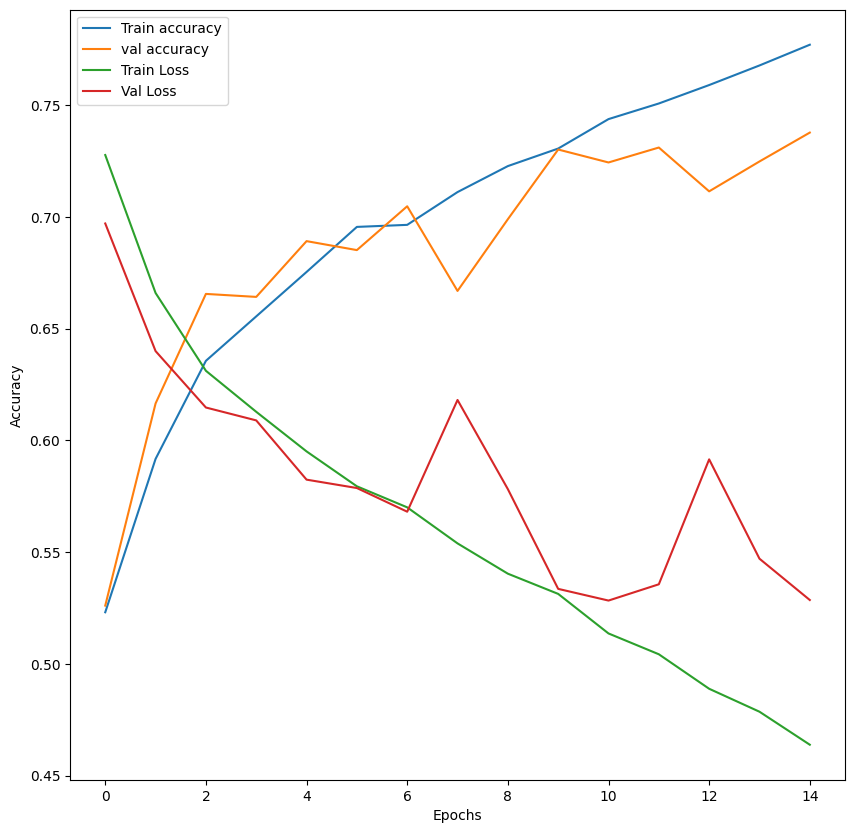

In [28]:
plt.figure(figsize = (10, 10))
plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')